In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/quark365/Dataset/main/ObesityDataSet.csv')

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.shape

(2111, 17)

In [ ]:
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
print(df.duplicated().sum())

24


In [ ]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(2087, 17)

In [ ]:
columns_to_check = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad']

for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Gender': ['Female' 'Male']
Unique values in 'family_history_with_overweight': ['yes' 'no']
Unique values in 'FAVC': ['no' 'yes']
Unique values in 'SMOKE': ['no' 'yes']
Unique values in 'SCC': ['no' 'yes']
Unique values in 'CAEC': ['Sometimes' 'Frequently' 'Always' 'no']
Unique values in 'CALC': ['no' 'Sometimes' 'Frequently' 'Always']
Unique values in 'MTRANS': ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Unique values in 'NObeyesdad': ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [ ]:
columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']

le = LabelEncoder()
ordinal_vars = {
    'CAEC': ['no', 'Sometimes', 'Frequently', 'Always'],
    'CALC': ['no', 'Sometimes', 'Frequently', 'Always']

}

for var, categories in ordinal_vars.items():
    df[var] = df[var].astype(pd.CategoricalDtype(categories=categories, ordered=True)).cat.codes

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [ ]:
df.shape

(2087, 17)

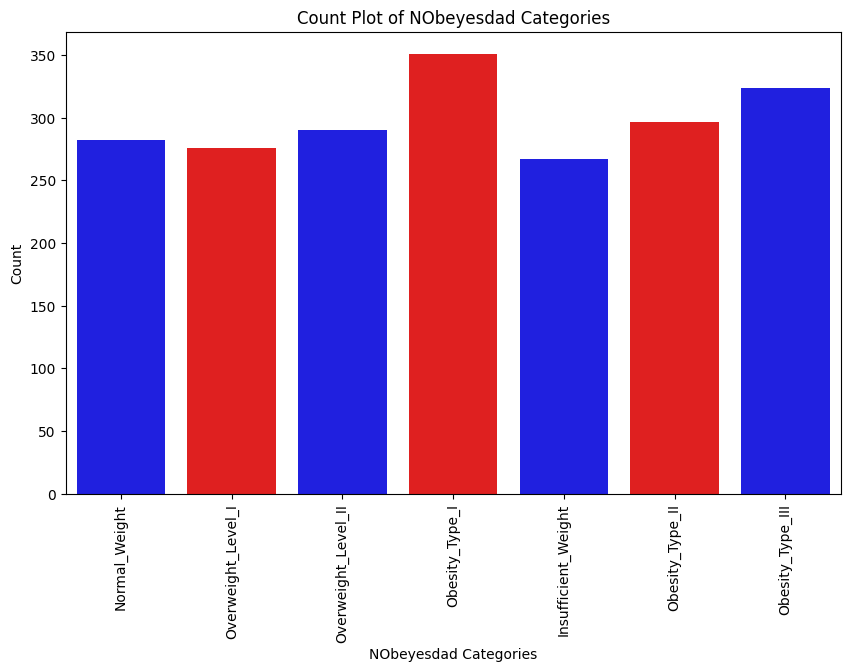

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df, palette=['blue', 'red'])

plt.xticks(rotation=90)

plt.title('Count Plot of NObeyesdad Categories')
plt.xlabel('NObeyesdad Categories')
plt.ylabel('Count')
plt.show()

In [ ]:
Codf = df.copy()
Codf['NObeyesdad'] = le.fit_transform(Codf['NObeyesdad'])
correlation_matrix = Codf.corr()

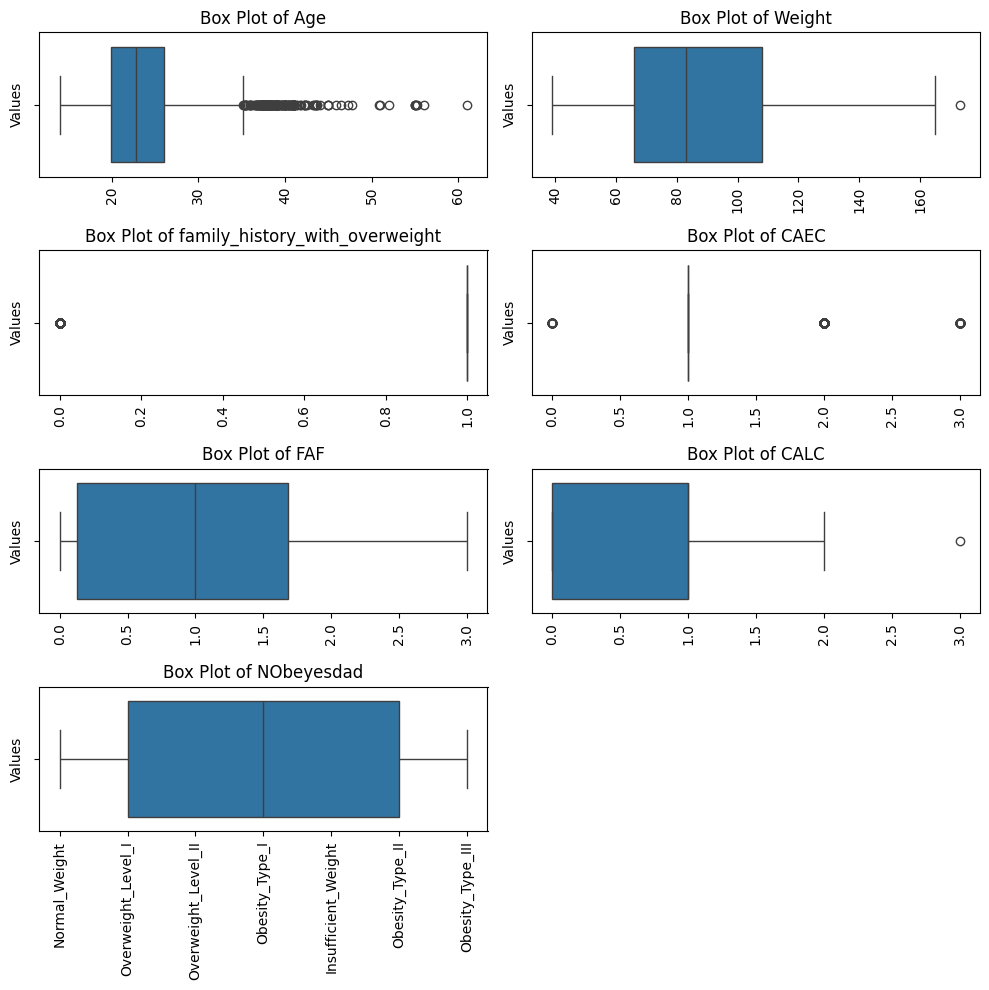

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


high_corr_columns = correlation_matrix.loc[(round(correlation_matrix['NObeyesdad'],2) > 0.1) | (correlation_matrix['NObeyesdad'] < -0.1), :].index

plt.figure(figsize=(10, 10))

for i, column in enumerate(high_corr_columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Values')

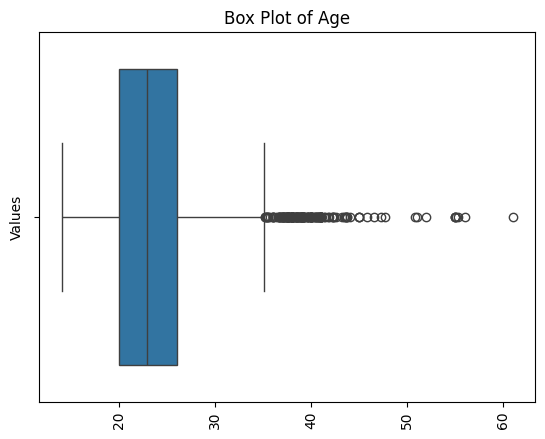

In [ ]:
sns.boxplot(x=df['Age'])
plt.title(f'Box Plot of Age')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Values')

Without Removing outliers from Age

In [ ]:
X = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


Logistic Regression
Cross-Validation Accuracy (K-fold): [0.57894737 0.68181818 0.63549161 0.67865707 0.65467626]
Mean Accuracy: 0.6459180980574393

Results on Test Data:
Accuracy: 0.8636363636363636
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.93      0.91        59
      Normal_Weight       0.87      0.64      0.74        61
     Obesity_Type_I       0.93      0.91      0.92        70
    Obesity_Type_II       0.93      1.00      0.96        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.71      0.71      0.71        55
Overweight_Level_II       0.69      0.82      0.75        49

           accuracy                           0.86       418
          macro avg       0.86      0.86      0.85       418
       weighted avg       0.87      0.86      0.86       418



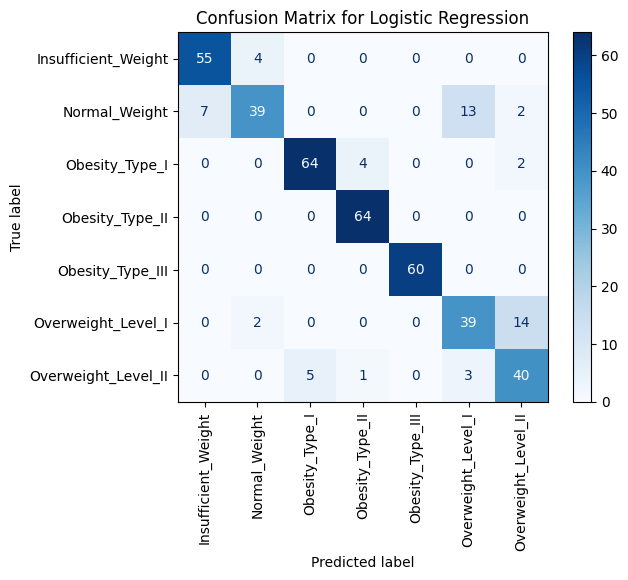


Random Forest
Cross-Validation Accuracy (K-fold): [0.73923445 0.98325359 0.98081535 0.98800959 0.98800959]
Mean Accuracy: 0.9358645141303226

Results on Test Data:
Accuracy: 0.9090909090909091
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.93      0.91        59
      Normal_Weight       0.86      0.70      0.77        61
     Obesity_Type_I       0.92      0.97      0.94        70
    Obesity_Type_II       1.00      1.00      1.00        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.82      0.85      0.84        55
Overweight_Level_II       0.84      0.88      0.86        49

           accuracy                           0.91       418
          macro avg       0.90      0.91      0.90       418
       weighted avg       0.91      0.91      0.91       418



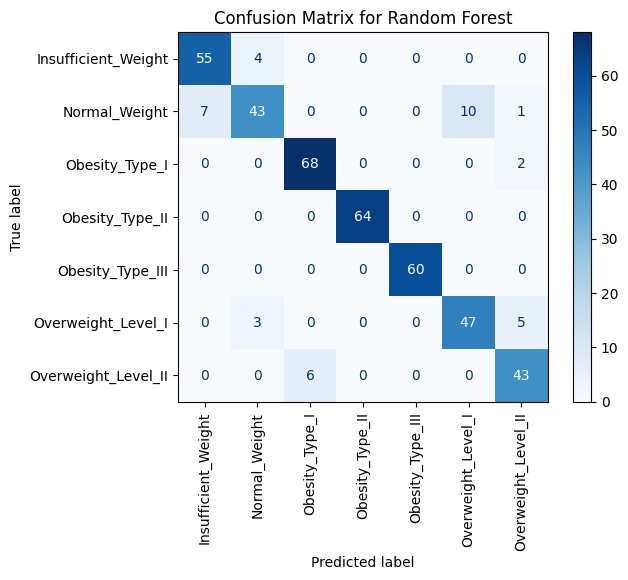


KNN
Cross-Validation Accuracy (K-fold): [0.81339713 0.88038278 0.90167866 0.88729017 0.9088729 ]
Mean Accuracy: 0.8783243261849849

Results on Test Data:
Accuracy: 0.7990430622009569
                     precision    recall  f1-score   support

Insufficient_Weight       0.69      0.86      0.77        59
      Normal_Weight       0.54      0.34      0.42        61
     Obesity_Type_I       0.75      0.91      0.83        70
    Obesity_Type_II       0.93      0.97      0.95        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.88      0.67      0.76        55
Overweight_Level_II       0.76      0.80      0.78        49

           accuracy                           0.80       418
          macro avg       0.79      0.79      0.79       418
       weighted avg       0.79      0.80      0.79       418



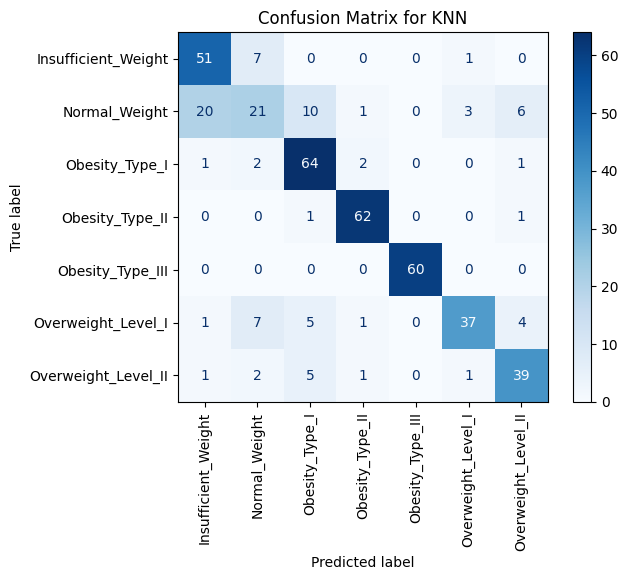


SVC
Cross-Validation Accuracy (K-fold): [0.6076555  0.62200957 0.62829736 0.51079137 0.56834532]
Mean Accuracy: 0.5874198249056257

Results on Test Data:
Accuracy: 0.868421052631579
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.80      0.86        59
      Normal_Weight       0.64      0.75      0.69        61
     Obesity_Type_I       0.93      0.93      0.93        70
    Obesity_Type_II       1.00      0.98      0.99        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.76      0.75      0.75        55
Overweight_Level_II       0.84      0.84      0.84        49

           accuracy                           0.87       418
          macro avg       0.87      0.86      0.87       418
       weighted avg       0.88      0.87      0.87       418



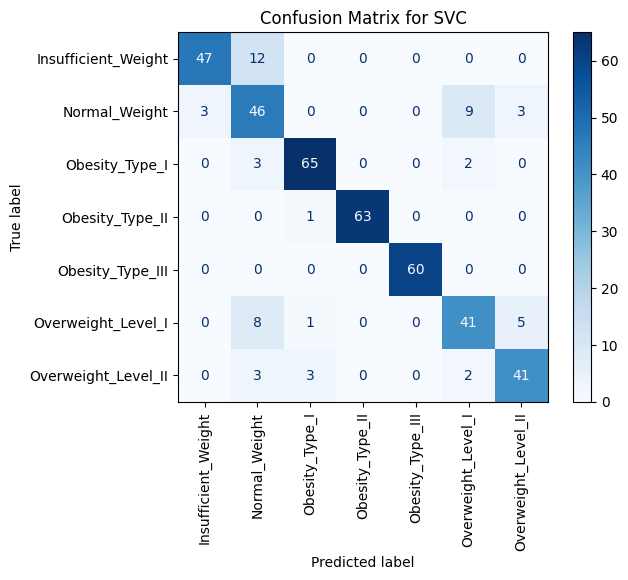

In [ ]:
def evaluate_models(X, y, X_train, y_train, X_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'KNN': KNeighborsClassifier(),
        'SVC': SVC()
    }
    for name, clf in models.items():
        print(f"\n{name}")

        scores = cross_val_score(clf, X, y, cv=5)
        print("Cross-Validation Accuracy (K-fold):", scores)
        print("Mean Accuracy:", np.mean(scores))

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        print("\nResults on Test Data:")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.xticks(rotation=90)
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

evaluate_models(X, y, X_train, y_train, X_test, y_test)

Removing outliers from age

In [ ]:
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

s = df.shape[0]

dfa = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age)]

print(f"Lower bound for outliers: {lower_bound_age}")
print(f"Upper bound for outliers: {upper_bound_age}")
print(f"Number of outliers removed: {s - dfa.shape[0]}")

Lower bound for outliers: 10.789843749999996
Upper bound for outliers: 35.12609375
Number of outliers removed: 167


Text(0, 0.5, 'Values')

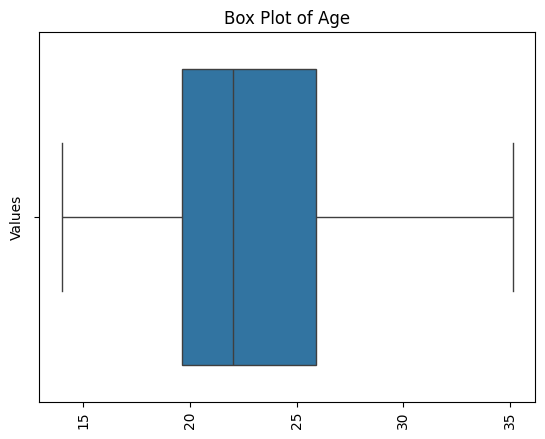

In [ ]:
sns.boxplot(x=dfa['Age'])
# sns.boxplot(x=df['Age'])
plt.title(f'Box Plot of Age')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Values')


Logistic Regression
Cross-Validation Accuracy (K-fold): [0.59635417 0.70572917 0.71875    0.71614583 0.67708333]
Mean Accuracy: 0.6828125

Results on Test Data:
Accuracy: 0.8489583333333334
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.86      0.88        57
      Normal_Weight       0.79      0.73      0.76        62
     Obesity_Type_I       0.83      0.96      0.89        54
    Obesity_Type_II       1.00      0.92      0.96        61
   Obesity_Type_III       1.00      1.00      1.00        58
 Overweight_Level_I       0.71      0.68      0.70        47
Overweight_Level_II       0.67      0.76      0.71        45

           accuracy                           0.85       384
          macro avg       0.84      0.84      0.84       384
       weighted avg       0.85      0.85      0.85       384



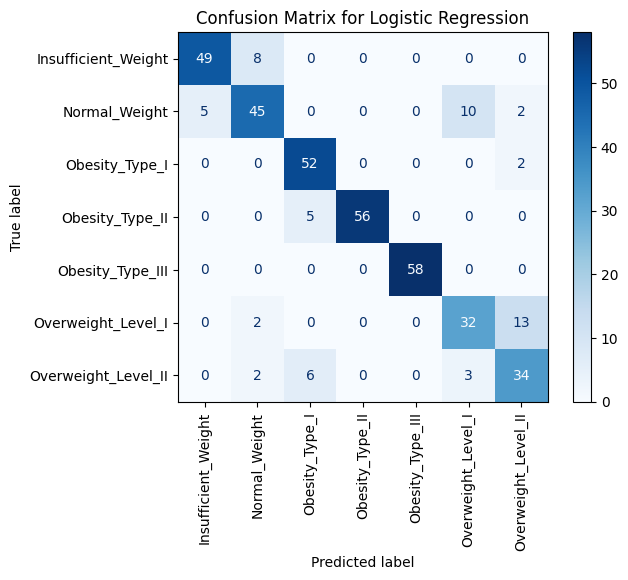


Random Forest
Cross-Validation Accuracy (K-fold): [0.75520833 0.97916667 0.98177083 0.98697917 0.98697917]
Mean Accuracy: 0.9380208333333334

Results on Test Data:
Accuracy: 0.921875
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.95      0.93        57
      Normal_Weight       0.89      0.79      0.84        62
     Obesity_Type_I       0.93      1.00      0.96        54
    Obesity_Type_II       0.98      0.98      0.98        61
   Obesity_Type_III       1.00      1.00      1.00        58
 Overweight_Level_I       0.87      0.87      0.87        47
Overweight_Level_II       0.83      0.84      0.84        45

           accuracy                           0.92       384
          macro avg       0.92      0.92      0.92       384
       weighted avg       0.92      0.92      0.92       384



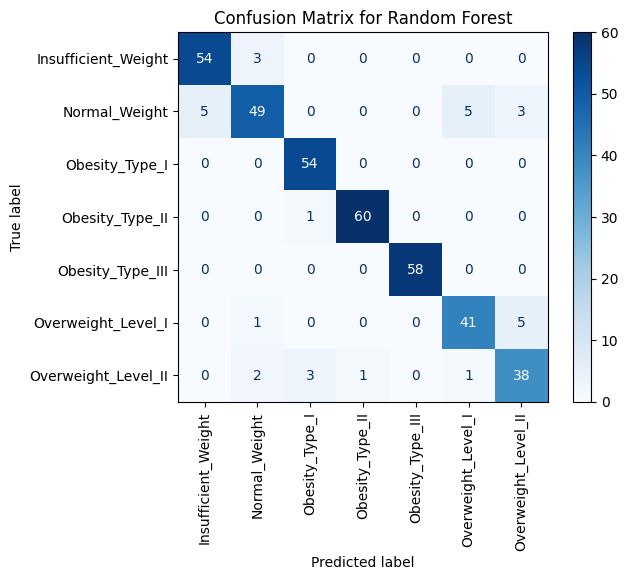


KNN
Cross-Validation Accuracy (K-fold): [0.80989583 0.88020833 0.89583333 0.89322917 0.90625   ]
Mean Accuracy: 0.8770833333333332

Results on Test Data:
Accuracy: 0.8203125
                     precision    recall  f1-score   support

Insufficient_Weight       0.69      0.93      0.79        57
      Normal_Weight       0.75      0.39      0.51        62
     Obesity_Type_I       0.84      0.98      0.91        54
    Obesity_Type_II       0.95      0.97      0.96        61
   Obesity_Type_III       1.00      1.00      1.00        58
 Overweight_Level_I       0.76      0.72      0.74        47
Overweight_Level_II       0.72      0.76      0.74        45

           accuracy                           0.82       384
          macro avg       0.82      0.82      0.81       384
       weighted avg       0.82      0.82      0.81       384



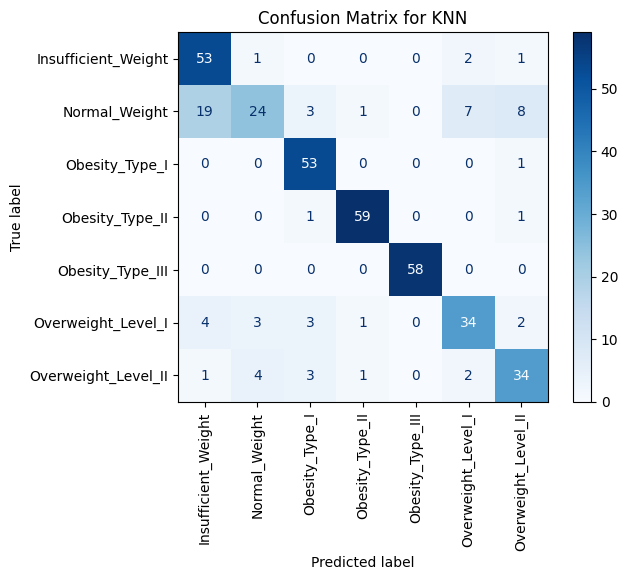


SVC
Cross-Validation Accuracy (K-fold): [0.61197917 0.62760417 0.55729167 0.5234375  0.56510417]
Mean Accuracy: 0.5770833333333333

Results on Test Data:
Accuracy: 0.8828125
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.84      0.90        57
      Normal_Weight       0.69      0.82      0.75        62
     Obesity_Type_I       0.93      1.00      0.96        54
    Obesity_Type_II       1.00      0.93      0.97        61
   Obesity_Type_III       1.00      1.00      1.00        58
 Overweight_Level_I       0.76      0.74      0.75        47
Overweight_Level_II       0.88      0.80      0.84        45

           accuracy                           0.88       384
          macro avg       0.89      0.88      0.88       384
       weighted avg       0.89      0.88      0.88       384



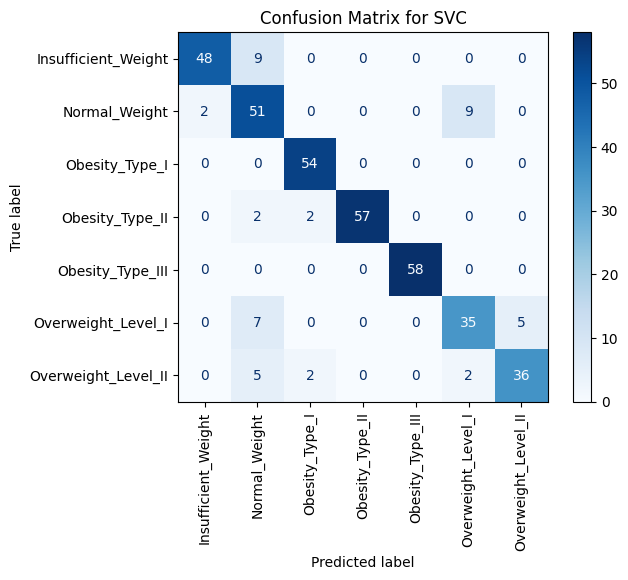

In [ ]:
X = dfa.drop(['NObeyesdad'], axis=1)
y = dfa['NObeyesdad']
# X = df.drop(['NObeyesdad'], axis=1)
# y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

evaluate_models(X, y, X_train, y_train, X_test, y_test)

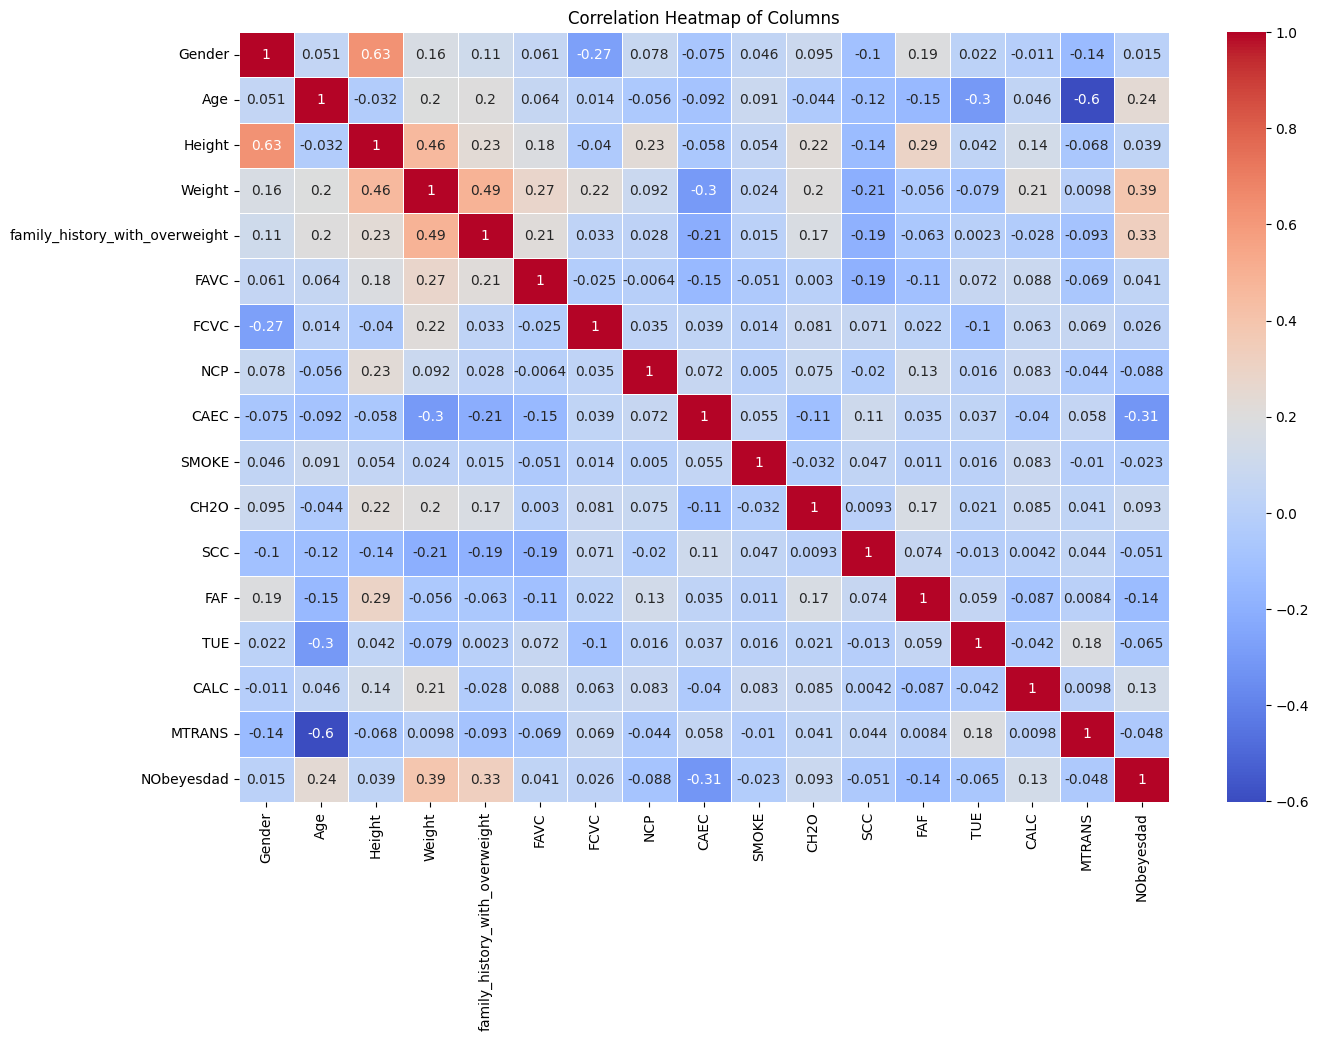

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap of Columns')
plt.show()

In [ ]:
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

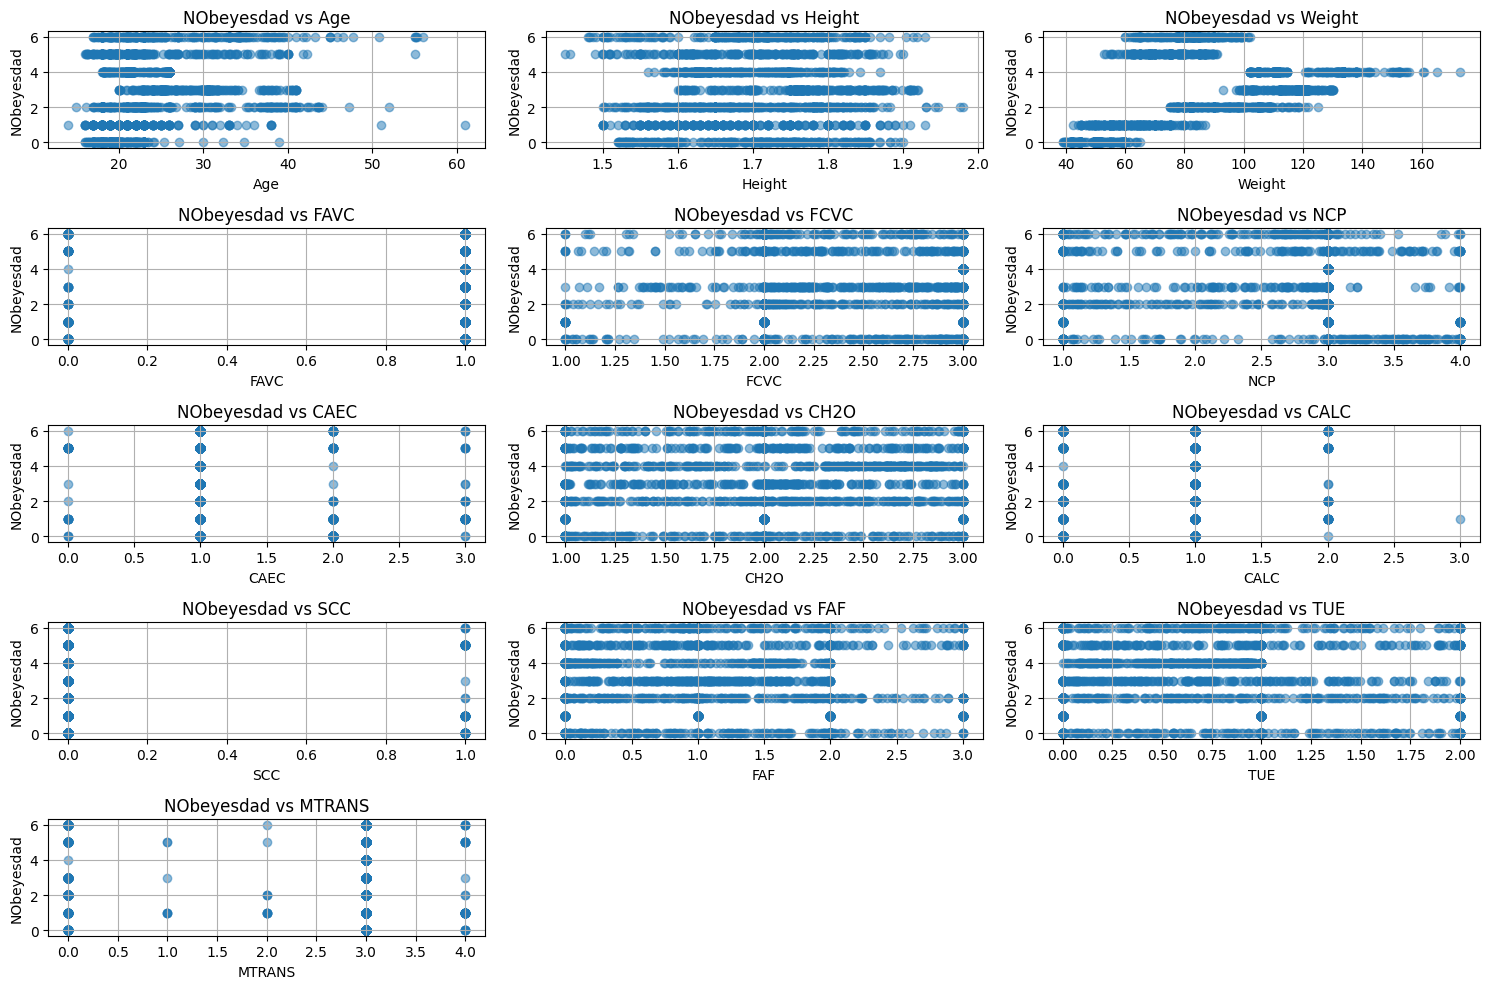

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

attributes = ['Age', 'Height', 'Weight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'CALC', 'SCC', 'FAF', 'TUE', 'MTRANS']


num_cols = 3
num_rows = (len(attributes) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, attribute in enumerate(attributes):
    ax = axes[i]
    ax.scatter(df[attribute], df['NObeyesdad'], alpha=0.5)
    ax.set_title(f'NObeyesdad vs {attribute}')
    ax.set_xlabel(attribute)
    ax.set_ylabel('NObeyesdad')
    ax.grid(True)

for j in range(len(attributes), num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()

plt.show()

## ###


Logistic Regression
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 10.0, 'max_iter': 200, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.9205698210584202

Results on Test Data:
Accuracy: 0.9036458333333334
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.82      0.89        57
      Normal_Weight       0.84      0.90      0.87        62
     Obesity_Type_I       0.88      0.96      0.92        54
    Obesity_Type_II       0.98      0.92      0.95        61
   Obesity_Type_III       1.00      1.00      1.00        58
 Overweight_Level_I       0.90      0.74      0.81        47
Overweight_Level_II       0.78      0.96      0.86        45

           accuracy                           0.90       384
          macro avg       0.91      0.90      0.90       384
       weighted avg       0.91      0.90      0.90       384



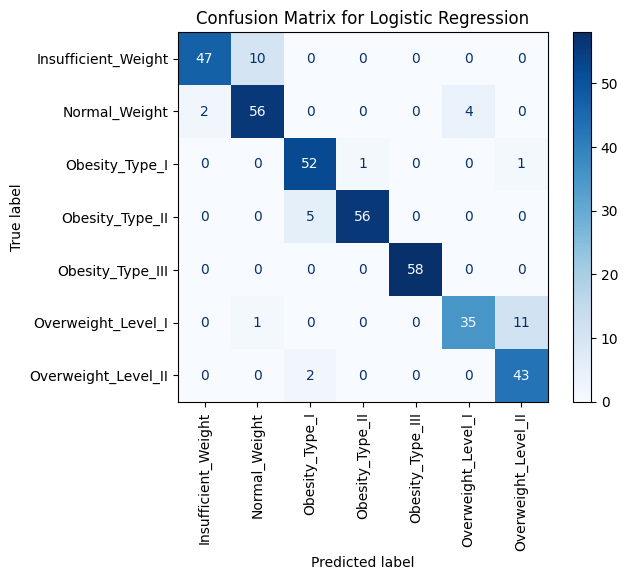


Random Forest
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9453212910867634

Results on Test Data:
Accuracy: 0.9348958333333334
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.96      0.95        57
      Normal_Weight       0.92      0.79      0.85        62
     Obesity_Type_I       0.95      1.00      0.97        54
    Obesity_Type_II       1.00      0.98      0.99        61
   Obesity_Type_III       1.00      1.00      1.00        58
 Overweight_Level_I       0.85      0.87      0.86        47
Overweight_Level_II       0.86      0.93      0.89        45

           accuracy                           0.93       384
          macro avg       0.93      0.93      0.93       384
       weighted avg       0.94      0.93      0.93       384



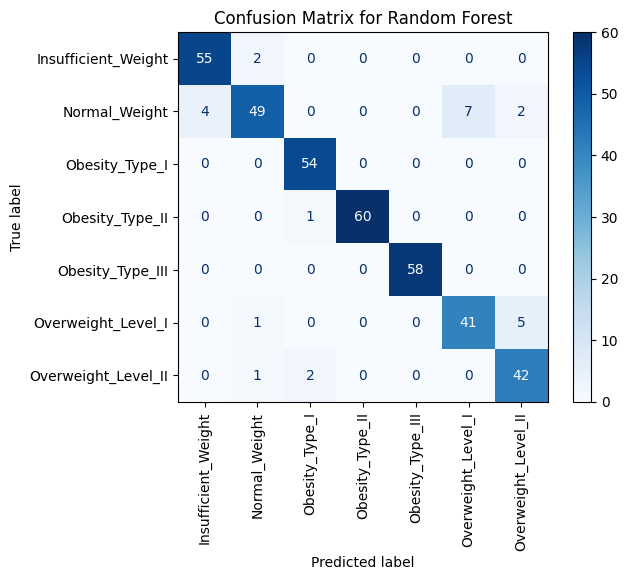


KNN
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.8684885147425863

Results on Test Data:
Accuracy: 0.8645833333333334
                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.95      0.89        57
      Normal_Weight       0.75      0.53      0.62        62
     Obesity_Type_I       0.89      1.00      0.94        54
    Obesity_Type_II       0.95      0.97      0.96        61
   Obesity_Type_III       1.00      1.00      1.00        58
 Overweight_Level_I       0.78      0.74      0.76        47
Overweight_Level_II       0.80      0.87      0.83        45

           accuracy                           0.86       384
          macro avg       0.86      0.87      0.86       384
       weighted avg       0.86      0.86      0.86       384



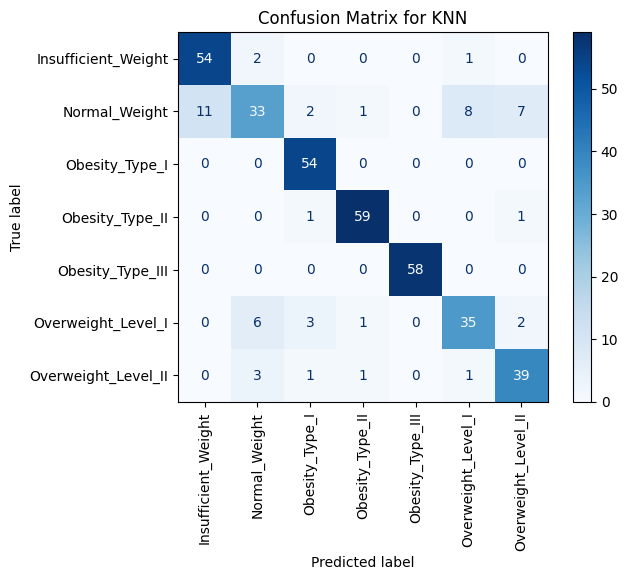


SVC
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.9622382503489995

Results on Test Data:
Accuracy: 0.9088541666666666
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.72      0.84        57
      Normal_Weight       0.78      0.98      0.87        62
     Obesity_Type_I       0.90      0.98      0.94        54
    Obesity_Type_II       0.98      0.93      0.96        61
   Obesity_Type_III       1.00      1.00      1.00        58
 Overweight_Level_I       0.97      0.77      0.86        47
Overweight_Level_II       0.81      0.96      0.88        45

           accuracy                           0.91       384
          macro avg       0.92      0.91      0.91       384
       weighted avg       0.92      0.91      0.91       384



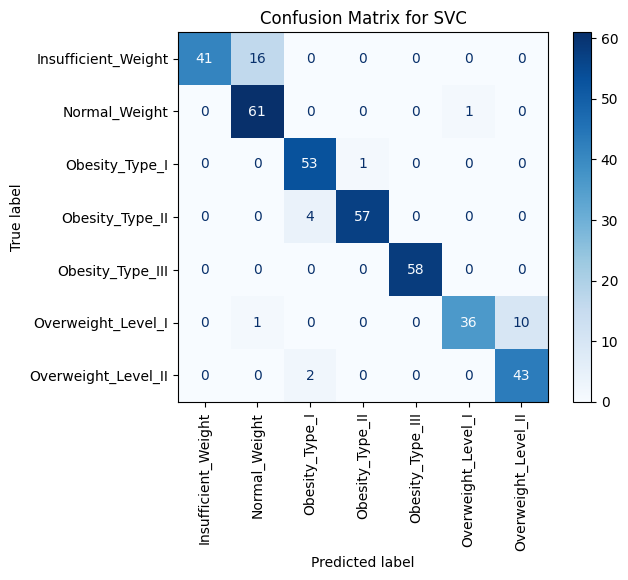

In [ ]:
from sklearn.model_selection import GridSearchCV

def evaluate_models(X, y, X_train, y_train, X_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'KNN': KNeighborsClassifier(),
        'SVC': SVC()
    }

    for name, clf in models.items():
        print(f"\n{name}")

        param_grid = {}

        if name == 'Logistic Regression':
            param_grid = {
                'C': [0.1, 1.0, 10.0],
                'solver': ['liblinear', 'lbfgs'],
                'max_iter': [100, 200, 300]
            }
        elif name == 'Random Forest':
            param_grid = {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5, 10]
            }
        elif name == 'KNN':
            param_grid = {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']
            }
        elif name == 'SVC':
            param_grid = {
                'C': [0.1, 1.0, 10.0],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale', 'auto']
            }


        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        print("Best Parameters:", grid_search.best_params_)
        print("Best Cross-Validation Accuracy:", grid_search.best_score_)

        best_clf = grid_search.best_estimator_
        y_pred = best_clf.predict(X_test)

        print("\nResults on Test Data:")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.xticks(rotation=90)
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

evaluate_models(X, y, X_train, y_train, X_test, y_test)

Considering outliers as NaN and filling it

In [ ]:
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age


dfai = df.copy()
s = dfai.shape[0]
dfai['Age'] = dfai['Age'].apply(lambda x: np.nan if x < lower_bound_age or x > upper_bound_age else x)

dfai['Age'].fillna(method='ffill', inplace=True)
dfai['Age'].fillna(method='bfill', inplace=True)

num_outliers_replaced = s - dfai['Age'].notna().sum()

print(f"Lower bound for outliers: {lower_bound_age}")
print(f"Upper bound for outliers: {upper_bound_age}")
print(f"Number of outliers replaced: {num_outliers_replaced}")

Lower bound for outliers: 10.789843749999996
Upper bound for outliers: 35.12609375
Number of outliers replaced: 0



Logistic Regression
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 10.0, 'max_iter': 100, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.9263185341029653

Results on Test Data:
Accuracy: 0.9186602870813397
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        59
           1       0.92      0.89      0.90        61
           2       0.97      0.94      0.96        70
           3       0.97      0.98      0.98        64
           4       1.00      1.00      1.00        60
           5       0.85      0.73      0.78        55
           6       0.73      0.96      0.83        49

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.91       418
weighted avg       0.92      0.92      0.92       418



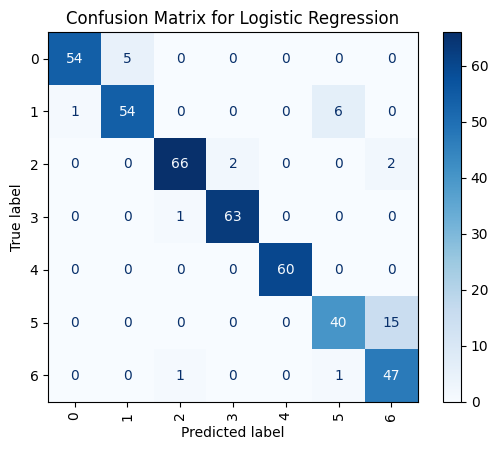


Random Forest
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9454820089550628

Results on Test Data:
Accuracy: 0.9234449760765551
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        59
           1       0.87      0.75      0.81        61
           2       0.93      0.99      0.96        70
           3       1.00      0.98      0.99        64
           4       1.00      1.00      1.00        60
           5       0.87      0.85      0.86        55
           6       0.87      0.92      0.89        49

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418



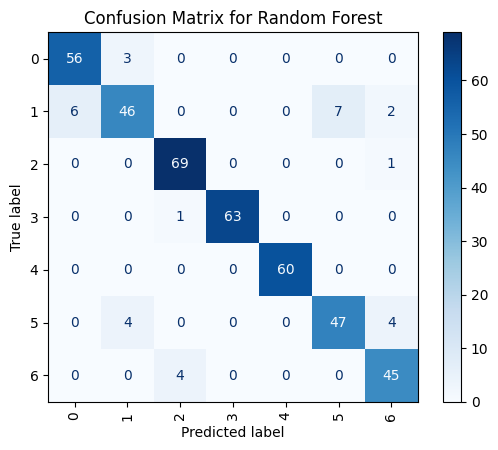


KNN
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.8711873550196904

Results on Test Data:
Accuracy: 0.8588516746411483
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        59
           1       0.72      0.54      0.62        61
           2       0.80      0.93      0.86        70
           3       0.97      0.98      0.98        64
           4       1.00      1.00      1.00        60
           5       0.80      0.75      0.77        55
           6       0.76      0.86      0.81        49

    accuracy                           0.86       418
   macro avg       0.85      0.86      0.85       418
weighted avg       0.86      0.86      0.85       418



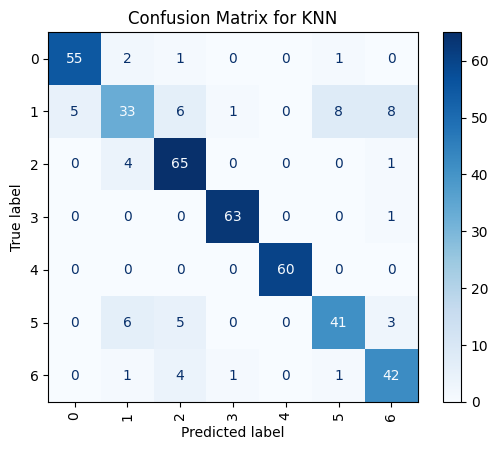


SVC
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.9616604628580676

Results on Test Data:
Accuracy: 0.9425837320574163
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        59
           1       0.89      0.97      0.93        61
           2       0.93      1.00      0.97        70
           3       1.00      0.98      0.99        64
           4       1.00      1.00      1.00        60
           5       0.96      0.82      0.88        55
           6       0.82      0.92      0.87        49

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.94       418



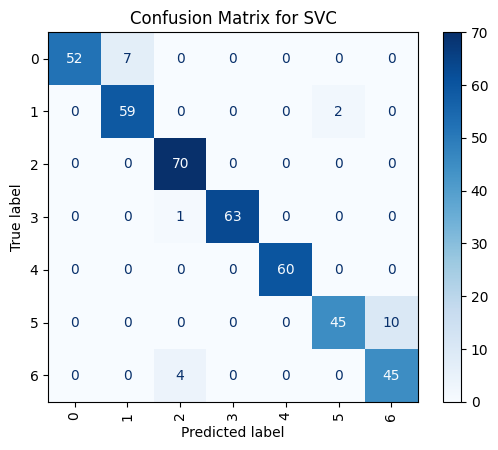

In [ ]:
X = dfai.drop(['NObeyesdad'], axis=1)
y = dfai['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

evaluate_models(X, y, X_train, y_train, X_test, y_test)